# This program mainly revolves around using Kafka and then gaining some basic insights in data


### Basic introduction to kafka 

###### Kafka® is used for building real-time data pipelines and streaming apps. It is horizontally scalable, fault-tolerant, wicked fast, and runs in production in thousands of companies. Some of the usecases include messaging, log aggregation, stream processing etc.(https://kafka.apache.org/). 

##### Kafka concepts :
###### Topics
    Every message that is feed into the system must be part of some topic. The topic is nothing but a stream of records. The messages are stored in key-value format. Each message is assigned a sequence, called Offset. The output of one message could be an input of the other for further processing.

###### Producers
    Producers are the apps responsible to publish data into Kafka system. They publish data on the topic of their choice.

###### Consumers
    The messages published into topics are then utilized by Consumers apps. A consumer gets subscribed to the topic of its choice and consumes data.

###### Broker
    Every instance of Kafka that is responsible for message exchange is called a Broker. Kafka can be used as a stand-alone machine or a part of a cluster.

### Setting up and running Apache Kafka
    Installing kafka on windows machine can be bit tricky. (https://dzone.com/articles/running-apache-kafka-on-windows-os) Said link provides overview for kafka installation on windows machine. You can also download docker image or kafka virtual machine. When installing on windows there are two points to consider. Firstly, change path name as per windows file naming convention (In windows file path has "\" and in linux we have "/"), these are to updated in 'zoo.cfg' i.e. zookeeper configuration and 'server.properties' of kafka installation. Secondly, instead of using zookeeper which comes with kafka download package, it's recommeded to install seperate instance of zookeeper from https://zookeeper.apache.org/.

###### Three python library are available to use Kafka viz.
    1. Kafka-Python – An open-source community-based library.
    2. PyKafka – This library is maintained by Parsly and it’s claimed to be a Pythonic API. Unlike Kafka-Python you can’t create dynamic topics.
    3. Confluent Python Kafka:- It is offered by Confluent as a thin wrapper around librdkafka. Confluent Kafka is created by same authors as Kakfa and since it uses librdkafka therefore it’s performance is better than the two, from research on web. 
    
    We are using Kafka-Python since its easier to use. Performance comparison can be done latter on (since that is not focus of this script).

### Lets start the party, firstly inviting people i.e. importing libraries

In [1]:
from kafka import KafkaProducer # importing producer from Kakfa-python libaries to send data to kafka
from kafka import KafkaConsumer # importing Consumer from Kakfa-python libaries to send data to kafka
import os # portable way of using operating system dependent functionality
import json # since we using json data
import requests # to download data
import pandas as pd # what is python without pandas !
from collections import Counter # to analyze data

### Address of the party i.e. set working directory

In [2]:
set_directory = r"G:\Present\Kafka"
os.chdir(set_directory)

### Main guest of the party i.e. Kafka (Producer and Consumer)
    After importing the Producer class from the kafka-python package, we construct a Producer instance and assign it to the variable producer.
    Since I'm using local instance of kafka hence bootstrap_servers value (which is used to specify the address of one or more brokers in your Kafka cluster) is 'localhost:9092', one can update as per his/her kafka instance.  One more thing you might have noticed, I'm serializing data (to byte strings) which is recommened against just sending data as strings.

In [3]:
producer = KafkaProducer(bootstrap_servers='localhost:9092',
                                 value_serializer=lambda v: json.dumps(v).encode('utf-8'),linger_ms=10)

#### After main guest has accept invitation (sucessful execution of  producer instance), time to get snacks and drinks (i.e. data) for the party
    Using requests we download the data in variable 'MOCK_DATA' 

In [4]:
response = requests.get("https://storage.googleapis.com/datascience-public/data-eng-challenge/MOCK_DATA.json")
MOCK_DATA = json.loads(response.text)
MOCK_DATA = json.dumps(MOCK_DATA)

In [5]:
MOCK_DATA # check if data is downloaded

'[{"id": 1, "first_name": "Barthel", "last_name": "Kittel", "email": "bkittel0@printfriendly.com", "gender": "Male", "ip_address": "130.187.82.195", "date": "06/05/2018", "country": "France"}, {"id": 2, "first_name": "Loy", "last_name": "Drain", "email": "ldrain1@earthlink.net", "gender": "Male", "ip_address": "218.176.26.2", "date": "23/02/2018", "country": "Philippines"}, {"id": 3, "first_name": "Wilhelm", "last_name": "Bacchus", "email": "wbacchus2@1688.com", "gender": "Male", "ip_address": "50.76.199.147", "date": "27/08/2018", "country": "China"}, {"id": 4, "first_name": "Megen", "last_name": "Paynton", "email": "mpaynton3@marriott.com", "gender": "Female", "ip_address": "38.166.3.43", "date": "21/11/2017", "country": "China"}, {"id": 5, "first_name": "Helli", "last_name": "Gaylard", "email": "hgaylard4@apple.com", "gender": "Female", "ip_address": "76.167.186.208", "date": "23/10/2017", "country": "China"}, {"id": 6, "first_name": "Adriane", "last_name": "Revens", "email": "areve

In [6]:
type(MOCK_DATA) # data-type

str

### Once you brought snack ( have data ), get them delivered to home
    Using producer instance created before we send the data via kafka. Also, kindly note topic (remember from introduction !). 'producer.flush()', blocks until all pending messages are at least put on the network. This does not guarantee delivery or success!

In [7]:
producer.send('Kafka_playground2-topic',MOCK_DATA)
producer.flush()

### Introducing, second main guest 'Kafka-Consumer'
    Remember 'bootstrap_server' value from producer instance, its the same here. 'auto_offset_reset', This flag tells Kafka where to start reading offsets in case you do not have any 'commit' yet. Finally, we have deserialize data since we serialized it before

In [8]:
consumer = KafkaConsumer(bootstrap_servers='localhost:9092',
                                 auto_offset_reset='earliest',
                                 value_deserializer=lambda m: json.loads(m))

In [9]:
consumer.subscribe(['Kafka_playground2-topic']) # offer snacks to guest, create consumer instance will subscribe to data on topic 'MOCK_DATA-topic'

In [10]:
type(consumer) # just checking type of consumer

kafka.consumer.group.KafkaConsumer

#### Check what Kafka-consumer is eating because he has a reputation to spill beans on party floor 
##### The consumer method will subscribe to the topics and continue to process data until it’s shutdown
    Lets see if consumer has received same data sent by producer and also check if serialization worked properply. We will then store the value (got from message.value) in 'MOCK_DATA_str', noticed '_str' in the end, its because data type is string.
    Remember you will have to stop consumer instance to stop receiving data.

In [11]:
for message in consumer:
        print (message)
        MOCK_DATA_str = message.value
consumer.close()

ConsumerRecord(topic='Kafka_playground2-topic', partition=0, offset=0, timestamp=1543155410341, timestamp_type=0, key=None, value='[{"id": 1, "first_name": "Barthel", "last_name": "Kittel", "email": "bkittel0@printfriendly.com", "gender": "Male", "ip_address": "130.187.82.195", "date": "06/05/2018", "country": "France"}, {"id": 2, "first_name": "Loy", "last_name": "Drain", "email": "ldrain1@earthlink.net", "gender": "Male", "ip_address": "218.176.26.2", "date": "23/02/2018", "country": "Philippines"}, {"id": 3, "first_name": "Wilhelm", "last_name": "Bacchus", "email": "wbacchus2@1688.com", "gender": "Male", "ip_address": "50.76.199.147", "date": "27/08/2018", "country": "China"}, {"id": 4, "first_name": "Megen", "last_name": "Paynton", "email": "mpaynton3@marriott.com", "gender": "Female", "ip_address": "38.166.3.43", "date": "21/11/2017", "country": "China"}, {"id": 5, "first_name": "Helli", "last_name": "Gaylard", "email": "hgaylard4@apple.com", "gender": "Female", "ip_address": "76.

KeyboardInterrupt: 

###### basic checks 

In [12]:
MOCK_DATA_str

'[{"id": 1, "first_name": "Barthel", "last_name": "Kittel", "email": "bkittel0@printfriendly.com", "gender": "Male", "ip_address": "130.187.82.195", "date": "06/05/2018", "country": "France"}, {"id": 2, "first_name": "Loy", "last_name": "Drain", "email": "ldrain1@earthlink.net", "gender": "Male", "ip_address": "218.176.26.2", "date": "23/02/2018", "country": "Philippines"}, {"id": 3, "first_name": "Wilhelm", "last_name": "Bacchus", "email": "wbacchus2@1688.com", "gender": "Male", "ip_address": "50.76.199.147", "date": "27/08/2018", "country": "China"}, {"id": 4, "first_name": "Megen", "last_name": "Paynton", "email": "mpaynton3@marriott.com", "gender": "Female", "ip_address": "38.166.3.43", "date": "21/11/2017", "country": "China"}, {"id": 5, "first_name": "Helli", "last_name": "Gaylard", "email": "hgaylard4@apple.com", "gender": "Female", "ip_address": "76.167.186.208", "date": "23/10/2017", "country": "China"}, {"id": 6, "first_name": "Adriane", "last_name": "Revens", "email": "areve

In [13]:
type(MOCK_DATA_str)

str

##### Converting str to json and then json to pandas datafram, now you mat ask why not directly convert string to dataframe (BTW we will use dataframe to gain insights in data mainly becaue pandas offer many functionalities). The reason is, if we convert str directly to dataframe then you will have to perform lot of restructuring, you can try ! But I would recommend to convert it into json then data frame

In [14]:
MOCK_DATA_JSON = json.loads(MOCK_DATA_str)
MOCK_DATA_df = pd.DataFrame(MOCK_DATA_JSON)

##### basic checks on data, data exploration !!! , 

In [15]:
MOCK_DATA_df.info() # understand the data-types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
country       1000 non-null object
date          1000 non-null object
email         1000 non-null object
first_name    1000 non-null object
gender        1000 non-null object
id            1000 non-null int64
ip_address    1000 non-null object
last_name     1000 non-null object
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


In [16]:
MOCK_DATA_df.isnull().sum() # do we have null values ? No !

country       0
date          0
email         0
first_name    0
gender        0
id            0
ip_address    0
last_name     0
dtype: int64

In [17]:
MOCK_DATA_df['country'].value_counts() # count of values in column 'country'

China                               202
Indonesia                           108
Philippines                          62
Russia                               60
Poland                               35
Portugal                             29
Sweden                               29
Brazil                               28
France                               25
United States                        21
Ukraine                              19
Japan                                18
Greece                               16
Thailand                             16
Czech Republic                       16
Canada                               13
Argentina                            13
Nigeria                              13
Peru                                 12
Serbia                               10
Albania                               8
Colombia                              7
Mexico                                7
Kazakhstan                            7
Bulgaria                              7


In [18]:
MOCK_DATA_df['country'].unique() #unique countries in column 'country'

array(['France', 'Philippines', 'China', 'Bolivia', 'Indonesia', 'Sweden',
       'Germany', 'Peru', 'Bulgaria', 'Belarus', 'Niger', 'Ethiopia',
       'Armenia', 'Moldova', 'United States', 'Tajikistan', 'Portugal',
       'Saudi Arabia', 'Poland', 'Ukraine', 'Japan', 'Azerbaijan',
       'Greece', 'Thailand', 'Russia', 'Colombia',
       'Bosnia and Herzegovina', 'Brazil', 'Canada', 'Pakistan',
       'Ecuador', 'Tanzania', 'Malaysia', 'Turkmenistan', 'Uganda',
       'Norway', 'Central African Republic', 'Nigeria', 'Mexico',
       'South Africa', 'Serbia', 'Egypt', 'Iran', 'Kazakhstan', 'Ireland',
       'Czech Republic', 'Israel', 'Spain', 'Argentina', 'Finland',
       'Albania', 'Bahamas', 'Cambodia', 'Venezuela', 'Luxembourg',
       'Palestinian Territory', 'Panama', 'Syria', 'Haiti', 'Macedonia',
       'Vietnam', 'Kosovo', 'Benin', 'Bangladesh', 'Bhutan', 'Tunisia',
       'Yemen', 'Guyana', 'Croatia', 'Comoros', 'Cyprus', 'Aland Islands',
       'Honduras', 'Lebanon', 'Papu

In [19]:
MOCK_DATA_df['country'].describe() # some information

count      1000
unique      113
top       China
freq        202
Name: country, dtype: object

####### From above we know that
    1. data consists of 1000 rows
    2. has 113 unique values
    3. 'China' has most occurences (202)

In [20]:
MOCK_DATA_df['email'].describe()

count                       1000
unique                      1000
top       kzuponer5@japanpost.jp
freq                           1
Name: email, dtype: object

### Lets analyze the snacks and drinks of the party
    Some examples could be:
    - Most and least represented country (top 3 and bottom 3)
    - Number of unique users in the current window

In [21]:
counts = Counter(MOCK_DATA_df['country'])
DATA_BAR_MOST_COUNTRIES = counts.most_common(3) # top 3
DATA_BAR_LEAST_COUNTRIES = counts.most_common()[-3:] # bottom 3
DATA_BAR_MOST_COUNTRIES.extend(DATA_BAR_LEAST_COUNTRIES) # combine list

    With above code idea is to create a new dataframe 'DATA_BAR_MOST_COUNTRIES'  that will have data of top 3 and bottom 3 representation of country. The least value is 1, in this dataframe only 3 countries (from bottom) will be selected with least value though more countries with same value may exist

In [22]:
DATA_BAR_MOST_COUNTRIES # just checking

[('China', 202),
 ('Indonesia', 108),
 ('Philippines', 62),
 ('North Korea', 1),
 ('Netherlands', 1),
 ('Sri Lanka', 1)]

In [23]:
DATA_BAR_MOST_COUNTRIES.extend([('Count of all countries', MOCK_DATA_df['country'].count())]) # add one more record which has count of all countries 

In [24]:
DATA_BAR_MOST_COUNTRIES

[('China', 202),
 ('Indonesia', 108),
 ('Philippines', 62),
 ('North Korea', 1),
 ('Netherlands', 1),
 ('Sri Lanka', 1),
 ('Count of all countries', 1000)]

In [25]:
type(DATA_BAR_MOST_COUNTRIES)

list

#### Numbers are good, figures are better !!! 

In [26]:
DATA_BAR_MOST_COUNTRIES = pd.DataFrame(DATA_BAR_MOST_COUNTRIES) # we like dataframe
DATA_BAR_MOST_COUNTRIES = DATA_BAR_MOST_COUNTRIES.rename(index=str, columns={0:"Country",1:"Count"}) # renaming column because 0 and 1 is not good name for columns

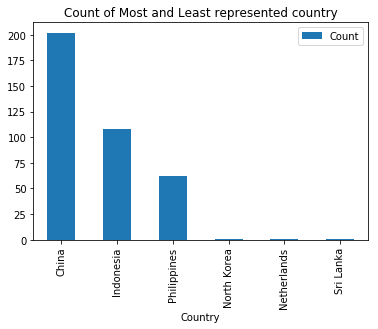

In [73]:
DATA_BAR_MOST_COUNTRIES.plot.bar(x="Country",title = "Count of Most and Least represented country") # plotting bar graph for visualization

In [28]:
DATA_BAR_MOST_COUNTRIES # statistical visaulization

,Country,Count
0,China,202
1,Indonesia,108
2,Philippines,62
3,North Korea,1
4,Netherlands,1
5,Sri Lanka,1
6,Count of all countries,1000


     From above, we can see that 'China' is most represented/ocurrences with count 202 in said dataset. 'Indonesia' and 'Philippines' are at second and third position with counts 108 and 62 respectively. Least represented countries are 'North Korea', 'Netherlands' and 'Sri Lanka'.

#### Lets take representation one step further, identify male and female representation in most and least represented countries 

In [29]:
# Lets create new data frame which will all required values
counts = Counter(MOCK_DATA_df['country'])
DATA_BAR_MOST_COUNTRIES = counts.most_common(3) # top 3
DATA_BAR_LEAST_COUNTRIES = counts.most_common()[-3:] # bottom 3
DATA_BAR_MOST_COUNTRIES.extend(DATA_BAR_LEAST_COUNTRIES) # Combine both list

In [30]:
type(DATA_BAR_MOST_COUNTRIES)

list

In [31]:
DATA_BAR_MOST_COUNTRIES = pd.DataFrame(DATA_BAR_MOST_COUNTRIES) # Convert to list to dataframe, we like pandas !
DATA_BAR_MOST_COUNTRIES = DATA_BAR_MOST_COUNTRIES.rename(index=str, columns={0:"Country",1:"Count"}) # renaming column

In [32]:
type(DATA_BAR_MOST_COUNTRIES)

pandas.core.frame.DataFrame

    Filter dataset, final dataset will contain values of required countries only (which are in DATA_BAR_MOST_COUNTRIES['Country']). 'isin' function is used to filter dataset

In [33]:
MOCK_DATA_df_Gender = MOCK_DATA_df[MOCK_DATA_df['country'].isin(DATA_BAR_MOST_COUNTRIES['Country'].tolist())]

In [34]:
MOCK_DATA_df_Gender

,country,date,email,first_name,gender,id,ip_address,last_name
1,Philippines,23/02/2018,ldrain1@earthlink.net,Loy,Male,2,218.176.26.2,Drain
2,China,27/08/2018,wbacchus2@1688.com,Wilhelm,Male,3,50.76.199.147,Bacchus
3,China,21/11/2017,mpaynton3@marriott.com,Megen,Female,4,38.166.3.43,Paynton
4,China,23/10/2017,hgaylard4@apple.com,Helli,Female,5,76.167.186.208,Gaylard
6,China,01/07/2018,gyakubowicz6@fda.gov,Ginger,Female,7,233.164.253.51,Yakubowicz
7,China,19/11/2017,tlinturn7@illinois.edu,Teador,Male,8,172.131.27.254,Linturn
8,Philippines,23/10/2017,sattwood8@npr.org,Sophi,Female,9,17.66.165.124,Attwood
9,Indonesia,18/02/2018,fkilcoyne9@themeforest.net,Florenza,Female,10,166.50.103.157,Kilcoyne
12,China,17/10/2017,iyakubovicsc@ning.com,Imojean,Female,13,116.33.62.11,Yakubovics
13,Indonesia,10/01/2018,stomensond@marketwatch.com,Sibel,Female,14,155.92.9.153,Tomenson


In [35]:
len(MOCK_DATA_df_Gender) # length of dataframe has been reduced to 375 from 1000 rows

375

In [36]:
MOCK_DATA_df_Gender['country'].value_counts() # just checking

China          202
Indonesia      108
Philippines     62
Sri Lanka        1
Netherlands      1
North Korea      1
Name: country, dtype: int64

    Using groupby on columns 'country' and 'gender' then applying value count function, we get required dataset in variable 'GENDER_COUNTRY_list'. Then bar graph is plotted for comparison

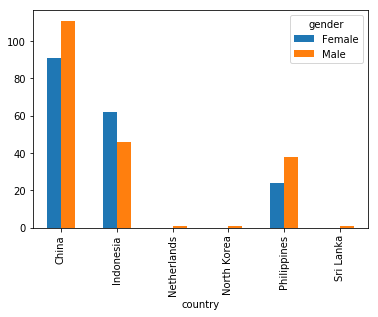

In [37]:
GENDER_COUNTRY_list = MOCK_DATA_df_Gender.groupby(['country'])['gender'].value_counts()
GENDER_COUNTRY_list.unstack().plot(kind='bar')

In [38]:
GENDER_COUNTRY_list

country      gender
China        Male      111
             Female     91
Indonesia    Female     62
             Male       46
Netherlands  Male        1
North Korea  Male        1
Philippines  Male       38
             Female     24
Sri Lanka    Male        1
Name: gender, dtype: int64

In [39]:
MOCK_DATA_df_Gender['gender'].value_counts()

Male      198
Female    177
Name: gender, dtype: int64

    From above, we observe 'China' has more male(111) representation than female(91) whereas in Indonesia its opposite, with female(62) representation dominating male(46) representation. Whereas, overall it male(198) has more representation than female(177)

### find number of unque users 

In [42]:
len(MOCK_DATA_df['email'].unique()) # form output, everyone is unique users based on their email-id

1000

### lets see which domain(email) do they use 

In [44]:
EMAIL_DOMAIN =  MOCK_DATA_df['email'].str.split('@').str[1] # 'email' column is splited on '@'
EMAIL_DOMAIN

0           printfriendly.com
1               earthlink.net
2                    1688.com
3                marriott.com
4                   apple.com
5               webeden.co.uk
6                     fda.gov
7                illinois.edu
8                     npr.org
9             themeforest.net
10                 flickr.com
11              discovery.com
12                   ning.com
13            marketwatch.com
14              delicious.com
15                alibaba.com
16               hatena.ne.jp
17          sciencedirect.com
18                    nba.com
19                   furl.net
20            cyberchimps.com
21                    aol.com
22               virginia.edu
23                  phpbb.com
24             deviantart.com
25                    163.com
26                 flavors.me
27                  phpbb.com
28                webnode.com
29            miibeian.gov.cn
                ...          
970               oaic.gov.au
971                   tiny.cc
972       

In [52]:
EMAIL_DOMAIN = pd.DataFrame(EMAIL_DOMAIN)
EMAIL_DOMAIN

,email
0,printfriendly.com
1,earthlink.net
2,1688.com
3,marriott.com
4,apple.com
5,webeden.co.uk
6,fda.gov
7,illinois.edu
8,npr.org
9,themeforest.net


In [53]:
EMAIL_DOMAIN['email'].value_counts() # there are 7 people who use 'hubpages.com'

hubpages.com           7
eventbrite.com         7
e-recht24.de           6
pinterest.com          6
php.net                6
buzzfeed.com           6
etsy.com               6
gnu.org                5
dailymail.co.uk        5
apple.com              5
washington.edu         5
discuz.net             5
usda.gov               5
reddit.com             5
sogou.com              5
printfriendly.com      5
seattletimes.com       5
earthlink.net          5
utexas.edu             5
constantcontact.com    5
posterous.com          5
google.ru              4
flickr.com             4
newsvine.com           4
nsw.gov.au             4
de.vu                  4
multiply.com           4
technorati.com         4
phpbb.com              4
wikimedia.org          4
                      ..
smugmug.com            1
walmart.com            1
bbc.co.uk              1
ibm.com                1
umn.edu                1
nifty.com              1
seesaa.net             1
bing.com               1
wufoo.com              1


### In conlusion,
    - Most and least represented country (top 3 and bottom 3) : China, Indonesia, Philippines are 3 most represented and Sri Lanka, Netherlands, North Korea are least represented. And we also checked male and female representation from these countries
    - Number of unique users in the current window : We observe all users are unique based on their email-id
### Final remarks,
    - Setting up Kafka server can be tricky on windows machine, kindly refer introduction section for pointers !
    - All above code has been tested for three test-cases in general viz. valid test case, invalid and to check limits.
    - Above code can easily be used to create function and use these function (Exception can be captured too !) but instead here focus was to get a working example of using Kafka.
    - I would have liked to use Spark for data streaming but that will need some time